In [1]:
import sys
sys.path.append(str('/home/jupyter/SearchForecasting/'))
import pandas as pd
from configparser import ConfigParser
from repo.MyConfigParser import MyConfigParser
from repo.Optimization import SavantPSO
import numpy as np

# Read In

In [2]:
updated_config = ConfigParser()
config_in_path = "/home/jupyter/SearchForecasting/Spain/June 2024 Update/config ups spain.ini"
updated_config.read(config_in_path)

getdict = MyConfigParser()
config_dict=getdict.GetDict(updated_config)
region = config_dict['CLIENTINFO']['country']
cutoff_month = config_dict['PROPHETSETTING']['cut_off_point']
base_start = config_dict['PROPHETSETTING']['reference_start_date1']
base_end = config_dict['PROPHETSETTING']['reference_end_date1']
periods = config_dict['PROPHETSETTING']['periods']
base_periods  = config_dict['PROPHETSETTING']['base_periods']

output_bucket = config_dict["FILEPATH"]["output_bucket"]
folder_name = config_dict["FILEPATH"]["folder_name"]

base_path = config_dict["FILEPATH"]["base_path"]

boundary_df_in_path = base_path + config_dict["FILEPATH"]["boundary_df_in_path"]
daily_df_out_path = base_path + config_dict["FILEPATH"]["daily_df_out_path"]
analytical_file_path = base_path + config_dict["FILEPATH"]["analytical_file_path"]
cuts_df_in_path = base_path + config_dict["FILEPATH"]["cuts_df_in_path"]
plot_name = base_path + config_dict["FILEPATH"]["plot_name"]
constraint_file_name = base_path + config_dict["FILEPATH"]["constraint_file_name"]
breakdown_ls = [config_dict['CLIENTINFO'][i] for i in [f'breakdown{i}' for i in range(1,5)] if config_dict['CLIENTINFO'][i] != None]

small_market_str = ''
pre_forecast_period_budget = float(config_dict['CLIENTINFO']['pre_forecast_period_budget'])
client_budget = float(config_dict['CLIENTINFO']['client_budget'])

save_date = config_dict['CLIENTINFO']['save_date']

In [3]:
# Get forecasters
bdDf = pd.read_csv(cuts_df_in_path)#.drop('Unnamed: 0', axis = 1)
cuts_df = bdDf.reset_index(drop = True)
cuts_df['forecaster_name_list'] =  cuts_df['market'] + ' ' + cuts_df['account_type'] + ' ' + cuts_df['funnel'] + '.pkl' #' 05.19.2021 Final.pkl'
cuts_df['periods'] = periods
cuts_df.drop(columns='Unnamed: 0', inplace=True)
# get model list
forecasters_array = cuts_df.forecaster_name_list

# Get analytical file
analytical_file = pd.read_csv(analytical_file_path).drop('Unnamed: 0', axis = 1)
analytical_file['ds'] = pd.to_datetime(analytical_file['ds'])
analytical_file = analytical_file.rename(columns={'region_x':'region'}).drop(columns='region_y')
analytical_file_check_version = analytical_file.copy()


# Get constrain file
constraint_file = pd.read_csv(constraint_file_name)
constraint_file['init'] = constraint_file[['MinWeight', 'MaxWeight']].mean(axis = 1)

# Functions

In [4]:
resultPSO = SavantPSO(cuts_df, analytical_file, constraint_file, config_dict)

In [5]:
itNum = 150
options = {'c1': 0.20255337412386598,
 'c2': 0.034812002156869526,
 'w': 0.8707709059066462}
result = resultPSO.run_pso(options, itNum = itNum)

2024-06-06 04:36:16,084 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.20255337412386598, 'c2': 0.034812002156869526, 'w': 0.8707709059066462}


/home/jupyter/SearchForecasting/Spain/June 2024 Update/Input Weight History 06.06.2024.csv


pyswarms.single.global_best:   0%|          |0/150

--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73322.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73322.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73322.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73322.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.-------

pyswarms.single.global_best:   1%|          |1/150, best_cost=-73322.0

yhat: -73322.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73481.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73393.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73400.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72931.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:   1%|▏         |2/150, best_cost=-73880.0

yhat: -72724.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73415.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73462.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73804.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73880.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:   2%|▏         |3/150, best_cost=-73886.0

yhat: -73149.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73807.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72417.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73106.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72869.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:   3%|▎         |4/150, best_cost=-74105.0

yhat: -73452.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73604.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72831.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73564.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73777.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:   3%|▎         |5/150, best_cost=-74105.0

yhat: -73772.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72954.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73108.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73144.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72755.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:   4%|▍         |6/150, best_cost=-74105.0

yhat: -74046.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72911.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73429.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73776.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73886.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:   5%|▍         |7/150, best_cost=-74105.0

yhat: -73465.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74114.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72760.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72594.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72948.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:   5%|▌         |8/150, best_cost=-74114.0

yhat: -73805.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73240.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73232.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73395.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73478.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:   6%|▌         |9/150, best_cost=-74114.0

yhat: -73069.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73558.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73412.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73251.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72716.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:   7%|▋         |10/150, best_cost=-74114.0

yhat: -72559.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73657.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73134.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73356.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73204.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:   7%|▋         |11/150, best_cost=-74114.0

yhat: -73345.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73081.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73298.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73272.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73406.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:   8%|▊         |12/150, best_cost=-74114.0

yhat: -73863.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73661.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73675.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73401.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72980.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:   9%|▊         |13/150, best_cost=-74114.0

yhat: -73539.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73879.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72904.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73338.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73146.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:   9%|▉         |14/150, best_cost=-74114.0

yhat: -73857.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73509.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73362.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72684.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73569.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  10%|█         |15/150, best_cost=-74114.0

yhat: -73648.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74039.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73741.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72823.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73208.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  11%|█         |16/150, best_cost=-74114.0

yhat: -73938.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73480.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73190.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74090.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73713.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  11%|█▏        |17/150, best_cost=-74114.0

yhat: -73754.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72911.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73639.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73380.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73822.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  12%|█▏        |18/150, best_cost=-74114.0

yhat: -73189.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72627.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73765.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73809.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73328.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  13%|█▎        |19/150, best_cost=-74114.0

yhat: -73691.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73252.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73339.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73999.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73708.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  13%|█▎        |20/150, best_cost=-74114.0

yhat: -73501.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73072.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73750.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73580.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74049.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  14%|█▍        |21/150, best_cost=-74114.0

yhat: -73946.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73958.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73227.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73694.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73355.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  15%|█▍        |22/150, best_cost=-74114.0

yhat: -73536.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72532.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73596.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74013.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72682.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  15%|█▌        |23/150, best_cost=-74126.0

yhat: -74073.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73336.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73899.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73593.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73138.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  16%|█▌        |24/150, best_cost=-74126.0

yhat: -73731.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73324.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73360.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73668.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73651.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  17%|█▋        |25/150, best_cost=-74126.0

yhat: -74125.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72896.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73721.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74036.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74092.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  17%|█▋        |26/150, best_cost=-74131.0

yhat: -73764.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72854.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73138.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74079.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72715.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  18%|█▊        |27/150, best_cost=-74267.0

yhat: -74118.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73832.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73512.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72508.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73321.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  19%|█▊        |28/150, best_cost=-74267.0

yhat: -72625.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72425.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73800.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73187.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73916.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  19%|█▉        |29/150, best_cost=-74267.0

yhat: -73253.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73473.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73237.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73516.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72500.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  20%|██        |30/150, best_cost=-74267.0

yhat: -72925.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73424.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73608.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73193.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73208.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  21%|██        |31/150, best_cost=-74267.0

yhat: -73579.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72934.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73903.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72875.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73847.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  21%|██▏       |32/150, best_cost=-74267.0

yhat: -73348.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72957.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73363.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73728.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72599.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  22%|██▏       |33/150, best_cost=-74267.0

yhat: -73119.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73846.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73696.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73473.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73403.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  23%|██▎       |34/150, best_cost=-74267.0

yhat: -73719.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73287.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73932.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73246.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73255.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  23%|██▎       |35/150, best_cost=-74267.0

yhat: -73575.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73014.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73348.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74146.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73081.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  24%|██▍       |36/150, best_cost=-74267.0

yhat: -73319.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73805.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73734.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73035.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73000.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  25%|██▍       |37/150, best_cost=-74267.0

yhat: -73088.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72147.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74033.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73659.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73869.0
client_budget - analytical_spend_latest_period: 0
--------

pyswarms.single.global_best:  25%|██▌       |38/150, best_cost=-74267.0

yhat: -73720.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73200.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73565.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73448.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72807.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  26%|██▌       |39/150, best_cost=-74267.0

yhat: -73473.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73941.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73914.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73323.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73625.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  27%|██▋       |40/150, best_cost=-74267.0

yhat: -73278.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72496.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73402.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73126.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73566.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  27%|██▋       |41/150, best_cost=-74267.0

yhat: -73812.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73472.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73788.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73595.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73329.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  28%|██▊       |42/150, best_cost=-74267.0

yhat: -73424.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73446.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74111.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73483.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73167.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  29%|██▊       |43/150, best_cost=-74267.0

yhat: -73253.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72969.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73688.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73179.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73819.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  29%|██▉       |44/150, best_cost=-74267.0

yhat: -72931.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73728.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73984.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73833.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73751.0
client_budget - analytical_spend_latest_period: 0
--------

pyswarms.single.global_best:  30%|███       |45/150, best_cost=-74267.0

yhat: -73583.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73664.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73465.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73494.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73371.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  31%|███       |46/150, best_cost=-74267.0

yhat: -73463.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73178.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73799.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73138.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73172.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  31%|███▏      |47/150, best_cost=-74267.0

yhat: -73072.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72979.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74119.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73833.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73793.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  32%|███▏      |48/150, best_cost=-74267.0

yhat: -73618.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72951.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73666.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73260.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73433.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  33%|███▎      |49/150, best_cost=-74267.0

yhat: -73530.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73542.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74030.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73152.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73223.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  33%|███▎      |50/150, best_cost=-74267.0

yhat: -73072.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72514.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73573.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73088.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73877.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  34%|███▍      |51/150, best_cost=-74267.0

yhat: -73689.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73559.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73968.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73588.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72673.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  35%|███▍      |52/150, best_cost=-74267.0

yhat: -73450.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73345.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73555.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73566.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73449.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  35%|███▌      |53/150, best_cost=-74267.0

yhat: -72977.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73476.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73974.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73307.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74046.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  36%|███▌      |54/150, best_cost=-74267.0

yhat: -73534.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73346.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73541.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73892.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72868.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  37%|███▋      |55/150, best_cost=-74267.0

yhat: -74108.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73911.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73916.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72652.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73592.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  37%|███▋      |56/150, best_cost=-74267.0

yhat: -72658.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72932.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74205.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73576.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73422.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  38%|███▊      |57/150, best_cost=-74267.0

yhat: -73476.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73758.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73766.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73095.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73156.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  39%|███▊      |58/150, best_cost=-74267.0

yhat: -73163.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73289.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74029.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72949.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73904.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  39%|███▉      |59/150, best_cost=-74267.0

yhat: -73170.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73222.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73504.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73935.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73843.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  40%|████      |60/150, best_cost=-74267.0

yhat: -73000.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73067.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73911.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73437.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73497.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  41%|████      |61/150, best_cost=-74267.0

yhat: -73738.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73557.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74215.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73421.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73322.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  41%|████▏     |62/150, best_cost=-74267.0

yhat: -72594.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72524.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73810.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73197.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74024.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  42%|████▏     |63/150, best_cost=-74267.0

yhat: -73584.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73418.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74145.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73805.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72805.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  43%|████▎     |64/150, best_cost=-74267.0

yhat: -73339.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73117.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73755.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73782.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73662.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  43%|████▎     |65/150, best_cost=-74267.0

yhat: -73292.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73117.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74066.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73445.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73562.0
client_budget - analytical_spend_latest_period: 0
--------

pyswarms.single.global_best:  44%|████▍     |66/150, best_cost=-74267.0

yhat: -73053.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72999.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73605.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73889.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73314.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  45%|████▍     |67/150, best_cost=-74267.0

yhat: -73812.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73630.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73970.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72658.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73174.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  45%|████▌     |68/150, best_cost=-74267.0

yhat: -72627.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72661.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73501.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73613.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73909.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  46%|████▌     |69/150, best_cost=-74267.0

yhat: -73608.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73604.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73898.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73103.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73836.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  47%|████▋     |70/150, best_cost=-74267.0

yhat: -73486.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73301.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74187.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72958.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73539.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  47%|████▋     |71/150, best_cost=-74267.0

yhat: -73486.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73347.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73762.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73856.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73417.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  48%|████▊     |72/150, best_cost=-74267.0

yhat: -73397.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73114.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74062.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73576.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73268.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  49%|████▊     |73/150, best_cost=-74267.0

yhat: -73352.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73815.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73590.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73015.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73137.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  49%|████▉     |74/150, best_cost=-74267.0

yhat: -73061.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72713.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73990.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73806.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72977.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  50%|█████     |75/150, best_cost=-74267.0

yhat: -73905.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73645.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73603.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73324.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73811.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  51%|█████     |76/150, best_cost=-74267.0

yhat: -72868.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73201.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73972.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73888.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73835.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  51%|█████▏    |77/150, best_cost=-74267.0

yhat: -73801.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73245.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73543.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73673.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73520.0
client_budget - analytical_spend_latest_period: 0
--------

pyswarms.single.global_best:  52%|█████▏    |78/150, best_cost=-74267.0

yhat: -73484.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73131.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74018.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72976.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73441.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  53%|█████▎    |79/150, best_cost=-74267.0

yhat: -73414.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73731.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73697.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73631.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74171.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  53%|█████▎    |80/150, best_cost=-74267.0

yhat: -73193.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72741.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74090.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73376.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73039.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  54%|█████▍    |81/150, best_cost=-74267.0

yhat: -73887.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73327.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73716.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73053.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73832.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  55%|█████▍    |82/150, best_cost=-74267.0

yhat: -72780.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73121.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74050.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73442.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72805.0
client_budget - analytical_spend_latest_period: 0
--------

pyswarms.single.global_best:  55%|█████▌    |83/150, best_cost=-74267.0

yhat: -73426.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73833.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73635.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73288.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73563.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  56%|█████▌    |84/150, best_cost=-74267.0

yhat: -73181.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72474.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74023.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73972.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73497.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  57%|█████▋    |85/150, best_cost=-74267.0

yhat: -73774.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73335.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73616.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72711.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73294.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  57%|█████▋    |86/150, best_cost=-74267.0

yhat: -73579.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73178.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74045.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73291.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73189.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  58%|█████▊    |87/150, best_cost=-74267.0

yhat: -73201.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72807.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73681.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74066.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74022.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  59%|█████▊    |88/150, best_cost=-74267.0

yhat: -73892.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72863.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74031.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72810.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72925.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  59%|█████▉    |89/150, best_cost=-74267.0

yhat: -72648.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73975.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73591.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73600.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73618.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  60%|██████    |90/150, best_cost=-74267.0

yhat: -73425.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72860.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73953.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74051.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73416.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  61%|██████    |91/150, best_cost=-74267.0

yhat: -74038.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73858.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74225.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72778.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73125.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  61%|██████▏   |92/150, best_cost=-74267.0

yhat: -72659.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72886.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73797.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73694.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72875.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  62%|██████▏   |93/150, best_cost=-74267.0

yhat: -73459.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73682.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74084.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73165.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73625.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  63%|██████▎   |94/150, best_cost=-74267.0

yhat: -73193.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73481.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73623.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72936.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74218.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  63%|██████▎   |95/150, best_cost=-74267.0

yhat: -72975.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73544.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73921.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73834.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72983.0
client_budget - analytical_spend_latest_period: 0
--------

pyswarms.single.global_best:  64%|██████▍   |96/150, best_cost=-74267.0

yhat: -73790.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73080.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74173.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73509.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73641.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  65%|██████▍   |97/150, best_cost=-74267.0

yhat: -73505.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73904.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73717.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73120.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74214.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  65%|██████▌   |98/150, best_cost=-74267.0

yhat: -73333.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72647.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74049.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72967.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72995.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  66%|██████▌   |99/150, best_cost=-74267.0

yhat: -73047.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73520.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73585.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73760.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73564.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  67%|██████▋   |100/150, best_cost=-74267.0

yhat: -73008.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72439.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73919.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73485.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74090.0
client_budget - analytical_spend_latest_period: 0
--------

pyswarms.single.global_best:  67%|██████▋   |101/150, best_cost=-74267.0

yhat: -72956.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73237.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74181.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72972.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72840.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  68%|██████▊   |102/150, best_cost=-74267.0

yhat: -73820.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73279.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73728.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73796.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73532.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  69%|██████▊   |103/150, best_cost=-74267.0

yhat: -72938.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73405.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74047.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73444.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74099.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  69%|██████▉   |104/150, best_cost=-74267.0

yhat: -73881.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73173.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73598.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73984.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72790.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  70%|███████   |105/150, best_cost=-74267.0

yhat: -72816.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73313.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73959.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73555.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73493.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  71%|███████   |106/150, best_cost=-74267.0

yhat: -73805.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72925.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73531.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73114.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74069.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  71%|███████▏  |107/150, best_cost=-74267.0

yhat: -73690.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73932.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73949.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73751.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72825.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  72%|███████▏  |108/150, best_cost=-74267.0

yhat: -73591.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73065.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73556.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73569.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73581.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  73%|███████▎  |109/150, best_cost=-74267.0

yhat: -73386.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73600.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74034.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73173.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74148.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  73%|███████▎  |110/150, best_cost=-74267.0

yhat: -73407.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72509.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73686.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73470.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72919.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  74%|███████▍  |111/150, best_cost=-74267.0

yhat: -73188.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73456.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74153.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73094.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73571.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  75%|███████▍  |112/150, best_cost=-74267.0

yhat: -73239.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73160.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73863.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73833.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74122.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  75%|███████▌  |113/150, best_cost=-74267.0

yhat: -73126.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73034.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73495.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73396.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72894.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  76%|███████▌  |114/150, best_cost=-74267.0

yhat: -73908.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72599.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73996.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73057.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73584.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  77%|███████▋  |115/150, best_cost=-74267.0

yhat: -72916.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73501.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73647.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73463.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73287.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  77%|███████▋  |116/150, best_cost=-74267.0

yhat: -73883.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73521.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74079.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73084.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73227.0
client_budget - analytical_spend_latest_period: 0
--------

pyswarms.single.global_best:  78%|███████▊  |117/150, best_cost=-74267.0

yhat: -72733.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73077.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73739.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73683.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72998.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  79%|███████▊  |118/150, best_cost=-74267.0

yhat: -73684.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73968.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74078.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73510.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73711.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  79%|███████▉  |119/150, best_cost=-74267.0

yhat: -73536.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73062.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73639.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73166.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73481.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  80%|████████  |120/150, best_cost=-74267.0

yhat: -73544.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73574.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74033.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73501.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73329.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  81%|████████  |121/150, best_cost=-74267.0

yhat: -73229.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72488.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73652.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73201.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73111.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  81%|████████▏ |122/150, best_cost=-74267.0

yhat: -73176.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73496.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74099.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72920.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73900.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  82%|████████▏ |123/150, best_cost=-74267.0

yhat: -73041.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73089.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73779.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73574.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72841.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  83%|████████▎ |124/150, best_cost=-74267.0

yhat: -73776.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73247.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74188.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73352.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73697.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  83%|████████▎ |125/150, best_cost=-74267.0

yhat: -72560.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72946.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73864.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73845.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73506.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  84%|████████▍ |126/150, best_cost=-74267.0

yhat: -73540.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73764.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74198.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73482.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73473.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  85%|████████▍ |127/150, best_cost=-74267.0

yhat: -72422.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72690.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73832.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73128.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73274.0
client_budget - analytical_spend_latest_period: 0
--------

pyswarms.single.global_best:  85%|████████▌ |128/150, best_cost=-74267.0

yhat: -73485.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73441.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74160.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73781.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73974.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  86%|████████▌ |129/150, best_cost=-74267.0

yhat: -73442.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73295.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73766.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74115.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72804.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  87%|████████▋ |130/150, best_cost=-74267.0

yhat: -73647.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72895.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74079.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72629.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73522.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  87%|████████▋ |131/150, best_cost=-74267.0

yhat: -73576.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72882.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73597.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73362.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73208.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  88%|████████▊ |132/150, best_cost=-74267.0

yhat: -72688.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73452.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73899.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73923.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73723.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  89%|████████▊ |133/150, best_cost=-74267.0

yhat: -73579.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73390.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74173.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72691.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73603.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  89%|████████▉ |134/150, best_cost=-74267.0

yhat: -72532.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72957.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73734.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73309.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73255.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  90%|█████████ |135/150, best_cost=-74267.0

yhat: -73593.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73706.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74005.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73997.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73867.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  91%|█████████ |136/150, best_cost=-74267.0

yhat: -72660.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73404.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73493.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72891.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -72566.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  91%|█████████▏|137/150, best_cost=-74267.0

yhat: -73733.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73129.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73957.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73644.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73359.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  92%|█████████▏|138/150, best_cost=-74267.0

yhat: -72893.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73592.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73592.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74115.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74033.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  93%|█████████▎|139/150, best_cost=-74267.0

yhat: -73843.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73441.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74026.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72941.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73678.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  93%|█████████▎|140/150, best_cost=-74267.0

yhat: -72924.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73168.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73660.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73710.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73509.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  94%|█████████▍|141/150, best_cost=-74267.0

yhat: -73824.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73511.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74087.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73428.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73094.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  95%|█████████▍|142/150, best_cost=-74267.0

yhat: -72700.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73377.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73737.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72967.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73756.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  95%|█████████▌|143/150, best_cost=-74267.0

yhat: -73648.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72897.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74138.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73850.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72529.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  96%|█████████▌|144/150, best_cost=-74267.0

yhat: -73396.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73645.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73808.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73625.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73262.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  97%|█████████▋|145/150, best_cost=-74267.0

yhat: -73308.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73619.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -74202.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73528.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73949.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  97%|█████████▋|146/150, best_cost=-74267.0

yhat: -73242.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73195.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73869.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72966.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73577.0
client_budget - analytical_spend_latest_period: 0
-----------

pyswarms.single.global_best:  98%|█████████▊|147/150, best_cost=-74267.0

yhat: -73125.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73047.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74231.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73692.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73387.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best:  99%|█████████▊|148/150, best_cost=-74267.0

yhat: -72847.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73518.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73892.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -73649.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -72995.0
client_budget - analytical_spend_latest_period: 0
---------

pyswarms.single.global_best:  99%|█████████▉|149/150, best_cost=-74267.0

yhat: -73621.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73370.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  -0.0
yhat: -74193.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73290.0
client_budget - analytical_spend_latest_period: 0
--------------Optimized spend isn't the same as what UPS planned.---------------
Test 1: total X next year:  774689.0 difference between planned and forecast X:  0.0
yhat: -73701.0
client_budget - analytical_spend_latest_period: 0
----------

pyswarms.single.global_best: 100%|██████████|150/150, best_cost=-74267.0
2024-06-06 05:25:39,441 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -74267.0, best pos: [1.14297725 1.19989815 0.88129362 1.03999198 0.81696274 1.13250005
 1.1562398  0.81890046 1.0167733  0.87677977 0.80531611 1.14228102
 0.91285808 1.17791302 1.00531475 0.89465615 0.85498215 1.09090257]


yhat: -73531.0
client_budget - analytical_spend_latest_period: 0
Compute duration: 2963.3588654994965


/home/jupyter/SearchForecasting/Spain/June 2024 Update/Pos Result 06.06.2024.csv
File generated
/home/jupyter/SearchForecasting/Spain/June 2024 Update/Iteration History 06.06.2024.csv
File generated


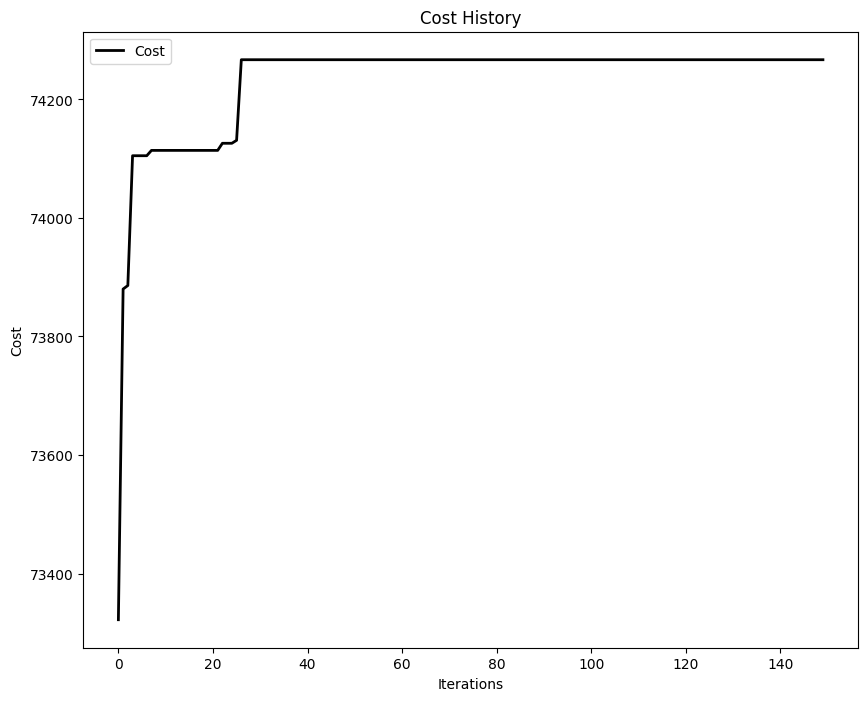

In [6]:
resultPSO.SaveResult(result)